In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def leap_year(year):  
    '''
    判断是否闰年，输入参数可以是字符串的年份或数字的年份
    '''
    if isinstance(year,int) and year>0:  # 判断是大于0的整数
        if (year%4 == 0 and year%100!=0) or year%400 == 0:
            return True  
        else:
            return False
    elif isinstance(year,str):
        if year.isdigit():
            if int(year)>0 and ((int(year)%4 == 0 and int(year)%100!=0) or int(year)%400 == 0):
                return True  
            elif int(year)>0:
                return False
        else: 
            return False
    else:
        return False          

def month_days(year):
    month_day_dict={k:0 for k in range(1,13)} #生成每个月天数的字典
    for k in month_day_dict.keys():
        if k==2 and leap_year(year):
            month_day_dict[2]=29
        elif k==2 and not leap_year(year):
            month_day_dict[2]=28
        elif k in [1,3,5,7,8,10,12]:
            month_day_dict[k]=31
        elif k in [4,6,9,11]:
            month_day_dict[k]=30
    return month_day_dict

# 任务2.1

In [3]:
A=pd.read_csv('./task-1A.csv',encoding="gbk")
B=pd.read_csv('./task-1B.csv',encoding="gbk")
C=pd.read_csv('./task-1C.csv',encoding="gbk")
D=pd.read_csv('./task-1D.csv',encoding="gbk")
E=pd.read_csv('./task-1E.csv',encoding="gbk")

def Add_dic(dica,dicb):
    '''
    输入值为两个字典，返回值为字典相加后
    '''
    dic={}
    for key in dica:
        if dicb.get(key):
            dic[key]=dica[key]+dicb[key]
        else:
            dic[key]=dica[key]
    for key in dicb:
        if dica.get(key):
            pass
        else:
            dic[key]=dicb[key]
    return dic

def Sale_6(df):
    '''
    输入值为pandas类型数据，返回值为六月商品销售量
    
    '''
    fun = df['支付时间'].apply(lambda x: x.startswith('2017/6'))
    df_m =  df[fun == True]
    df_6 =dict(df_m['商品'].value_counts())
    return df_6

alldata = [A,B,C,D,E]
all_sale_6 = {}
for i in alldata:
    sale = Sale_6(i)
    all_sale_6 = Add_dic(all_sale_6,sale)

#排序，得到销量前的商品
sale_6 = sorted(all_sale_6.items(),key=lambda all_sale_6:all_sale_6[1],reverse=True)
sale_6_5 = sale_6[:5]    

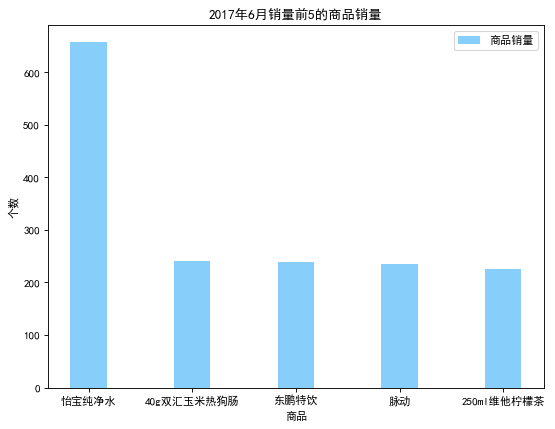

In [4]:
# 创建一个点数为 8 x 6 的窗口, 并设置分辨率为 80像素/每英寸
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)

N = 5
values = []
for i in range(len(sale_6_5)):
    values.append(sale_6_5[i][1])
y = []
for i in range(len(sale_6_5)):
    y.append(sale_6_5[i][0])
    
index = np.arange(N)
width = 0.35
p2 = plt.bar(index, values, width, label="商品销量", color="#87CEFA")
plt.xlabel('商品')
plt.ylabel('个数')
plt.title('2017年6月销量前5的商品销量')
plt.xticks(index, y)
plt.legend(loc="upper right")
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.show()

# 任务2.2

In [5]:
def Preprocessing(df,date,days):
    fun = df['支付时间'].apply(lambda x: x.startswith(date))
    df_m =  df[fun == True]
    turnover = df_m['实际金额'].sum()
    count = df_m.shape[0]
    month_averages = turnover/count
    daily_order = count/days
    return turnover,count,month_averages,daily_order

#每台售货机每月总交易额
allturnover = []
allcount = []
allmonth_averages = []
alldaily_order = []
months = month_days(2017)
for i in alldata:
    turnover = []
    count = []
    month_averages = []
    daily_order = []
    for j in months:       
        a,b,c,d = Preprocessing(i,'2017/%d'%(j),months[j])
        turnover.append(a)
        count.append(b)
        month_averages.append(c)
        daily_order.append(d)
    allturnover.append(turnover)
    allcount.append(count)
    allmonth_averages.append(month_averages)
    alldaily_order.append(daily_order)

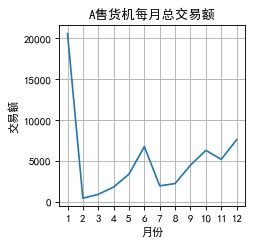

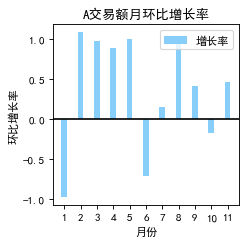

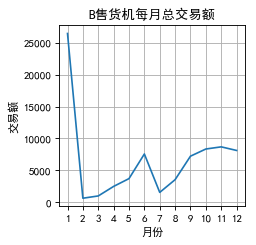

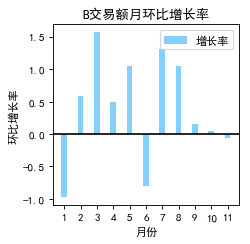

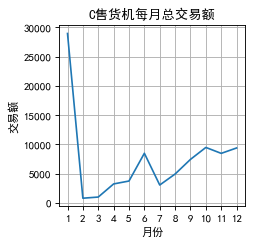

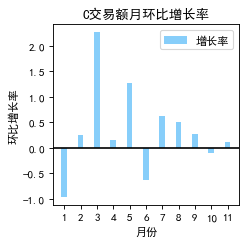

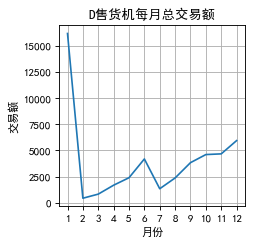

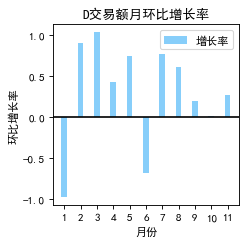

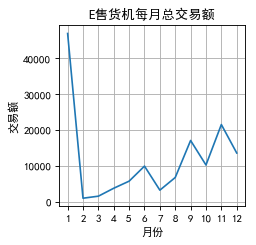

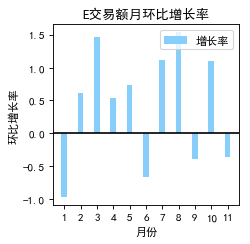

In [6]:
alldataname = ['A','B','C','D','E']
for i in range(5): 
    # 创建一个点数为 8 x 6 的窗口, 并设置分辨率为 80像素/每英寸
    plt.figure(figsize=(3, 3), dpi=80)
    plt.subplot(1, 1, 1)

    year=range(1,13,1)
    perple = allturnover[i]
    plt.plot(year,perple)
    plt.xlabel('月份')
    plt.ylabel('交易额')
    plt.title('%s售货机每月总交易额'%(alldataname[i]))
    plt.xticks(year)
    # pyplot.yticks([0, 25, 50, 75, 90])
    plt.grid(True)
    plt.show()
    
    
    #交易额月环比增长率
    Chain_growth_rate = []
    for j in range(1,12,1):
        Chain_growth_rate.append((allturnover[i][j]-allturnover[i][j-1])/allturnover[i][j-1]) 
        
    plt.figure(figsize=(3,3), dpi=80)
    plt.subplot(1, 1, 1)

    N = 11
    values = Chain_growth_rate
    index = np.arange(N)
    width = 0.35
    p2 = plt.bar(index, values, width, label="增长率", color="#87CEFA")
    plt.xlabel('月份')
    plt.ylabel('环比增长率')
    plt.title('%s交易额月环比增长率'%(alldataname[i]))
    bb = range(1,12,1)
    plt.xticks(index, bb)
    plt.axhline(y=0, color='black', linestyle='-')
    plt.legend(loc="upper right")
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False       #解决负数坐标显示问题
    plt.show()

# 任务2.3

In [7]:
label=pd.read_csv('./附件2.csv',encoding="gbk")
category_one = dict()
category_two= dict()
for _, row in label.iterrows():
    foodname, category_1, category_2 = row
    category_one.update({str(foodname): category_1})
    category_two.update({str(foodname): category_2})

In [8]:
def Profit(df):
    '''
    计算每台售货机的毛利润
    '''
    for i in category_one:
        df.loc[df['商品']==i,'大类'] =  category_one[i]
    final = df.groupby(by=['大类'])['实际金额'].sum()
    final = final.to_frame()
    final = final.values.T.tolist()
    drinks_turnover = final[0][0]*0.25
    nodrinks_turnover = final[0][1]*0.20
    profit = drinks_turnover + nodrinks_turnover
    return profit

total_gross_profit = []
for i in alldata:
    profit = Profit(i)
    total_gross_profit.append(profit)

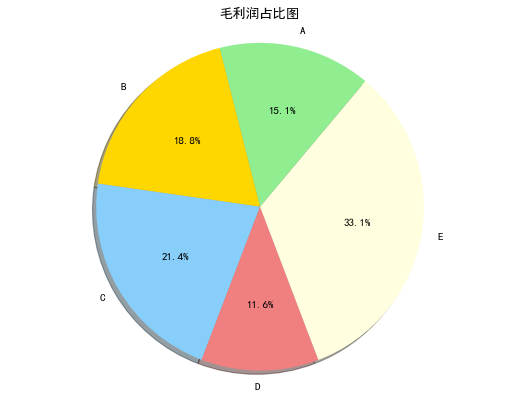

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)

labels='A','B','C','D','E'
plt.title("毛利润占比图")
sizes = total_gross_profit[0],total_gross_profit[1],total_gross_profit[2],total_gross_profit[3],total_gross_profit[4]
colors='lightgreen','gold','lightskyblue','lightcoral','lightyellow'
explode=0,0,0,0,0
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=50)
plt.axis('equal')
plt.show()

# 任务2.4

In [10]:
df=pd.read_csv('./附件1.csv',encoding="gbk")

In [11]:
def Classify(df):
    '''
    返回由二级类目、月份、每月交易额均值组成的dataframe
    '''
    month = range(1,13,1)
    df_group = label.groupby(by = '二级类')
    Cata_list = list(df_group.groups.keys())
    Class = []
    monthall = []
    for i in range(12):
        Class.extend(Cata_list[:])
    for i in range(1,13,1):
        month = [i]*20
        monthall.extend(month[:])
    mean_value = pd.DataFrame({"Class":Class,"month":monthall,"order":0})
    
    month = range(1,13,1)
    for i in category_two:
        df.loc[df['商品']==i,'二级类'] =  category_two[i]
    for j in month:
        for k in Cata_list:                    
            fun = df['支付时间'].apply(lambda x: x.startswith('2017/%d'%(j)))
            df_2 =  df[fun == True]
            df_3 = df_2[df_2["二级类"] == k]
            money = df_3['实际金额'].sum()/5
            mean_value.loc[(mean_value['Class'] == k)&(mean_value['month'] == j),'order'] = money
    return mean_value

def DrawBubble(mean_value):#气泡图
    sns.set(style = "whitegrid")#设置样式
    x = mean_value.month
    y = mean_value.Class
    z = mean_value.order
    cm = plt.cm.get_cmap('RdYlBu')
    fig,ax = plt.subplots(figsize = (12,10))
    bubble = ax.scatter(x, y , s = (z - np.min(z) + 0.1) , c = z, cmap = cm, linewidth = 0.5, alpha = 0.5)
    ax.grid()
    fig.colorbar(bubble)
    ax.set_xlabel('月份', fontsize = 15)
    ax.set_ylabel('二级类', fontsize = 15)
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    plt.show()

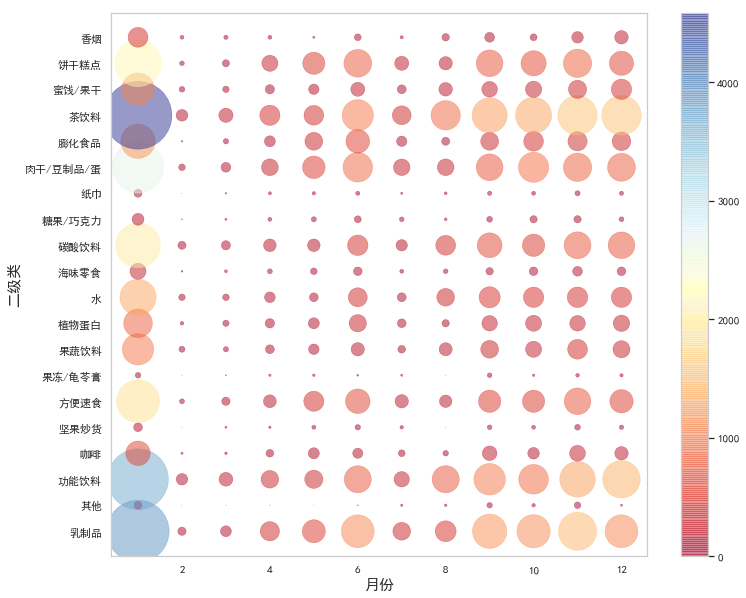

In [12]:
mean_value = Classify(df)
DrawBubble(mean_value)

# 任务2.5

In [13]:
def Order_hour(i):
    '''
    返回售货机C每月每天每个小时的订单量
    '''
    month = {6:30,7:31,8:31}
    hour = range(0,24,1)
    allorder = []
    days = []
    for j in range(month[i]):
        order = []
        for k in hour:
            day = '%d/%d'%(i,j)
            days.append(day)
            date = '2017/%d/%d %d'%(i,j,k)
            fun = C['支付时间'].apply(lambda x: x.startswith(date))
            df_m =  C[fun == True]
            count = df_m.shape[0]
            order.append(count)
        allorder.append(order)
    allorder1 = np.array(allorder)
    allorder2 = allorder1.transpose()
    return allorder2

In [14]:
order_6 = Order_hour(6)
order_7 = Order_hour(7)
order_8 = Order_hour(8)

Text(104.5, 0.5, '小时')

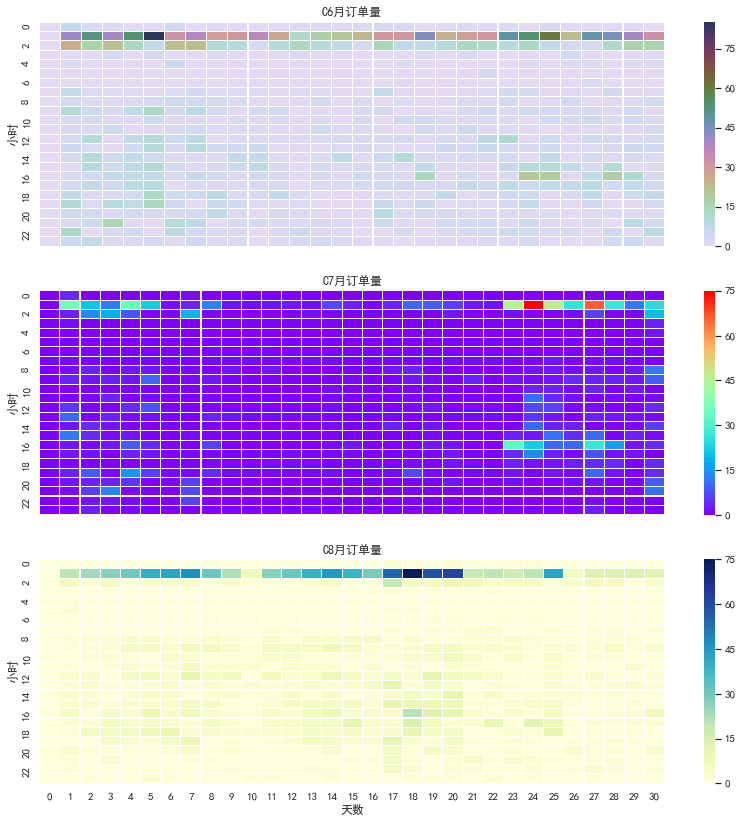

In [15]:
f,(ax1,ax2,ax3) = plt.subplots(figsize = (14,14),nrows=3)
cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(order_6, linewidths = 0.05, ax = ax1, vmax=np.max(order_6), vmin=0, cmap=cmap)

ax1.set_title('C6月订单量')
ax1.set_xlabel('')
ax1.set_xticklabels([]) #设置x轴图例为空值
ax1.set_ylabel('小时')

sns.heatmap(order_7, linewidths = 0.05, ax = ax2, vmax=np.max(order_7), vmin=0, cmap='rainbow')
ax2.set_title('C7月订单量')
ax2.set_xticklabels([]) #设置x轴图例为空值
ax2.set_ylabel('小时')

sns.heatmap(order_8,linewidths = 0.05, ax = ax3, vmax=np.max(order_8), vmin=0, cmap='YlGnBu')
ax3.set_title('C8月订单量')
ax3.set_xlabel('天数')
ax3.set_ylabel('小时')